# Elements of Convex Optimization 2024 - Homework 1

### Solution author: <Kuba Czech, 156035>

The purpose of this notebook is to implement methods for univariate optimization. The notebook will use helper functions to create and draw functions (in [eco_hw1_helpers.py](eco_hw1_helpers.py) file, but there is no need to look at it).

This exercise requires **numpy**, **matplotlib** and **[autograd](https://github.com/HIPS/autograd)** libraries:

In [ ]:
#!pip install numpy matplotlib autograd

In [59]:
# a line making the graphs show up in the notebook
# you can safely ignore it (but run it!).
%matplotlib inline

# Some important imports:
from eco_hw1_helpers import Function
import random
import math

# Bogus search

In [8]:
# Sample implementation of algorithm that assumes that minimum is in the middle of the domain or at 0 and actually doesn't
# search very extensively.
# as arguments it takes the function object and number of function calls to perform
# It returns a tuple with all visited points in order of visit(for plotting purposes) and the minimizer it "found"
def bogus_search(function: Function, n: int):
    a, b = function.domain
    m = (a + b) / 2
    bogus_visited_points_in_order = [m]
    m_value = function.evaluate(m)
    bogus_minimizer = m
    if a <= 0 <= b and n > 1:
        bogus_visited_points_in_order.append(0)
        if m_value > function.evaluate(0):
            bogus_minimizer = 0
    print(bogus_visited_points_in_order)
    return bogus_visited_points_in_order, bogus_minimizer

[-0.5, 0]


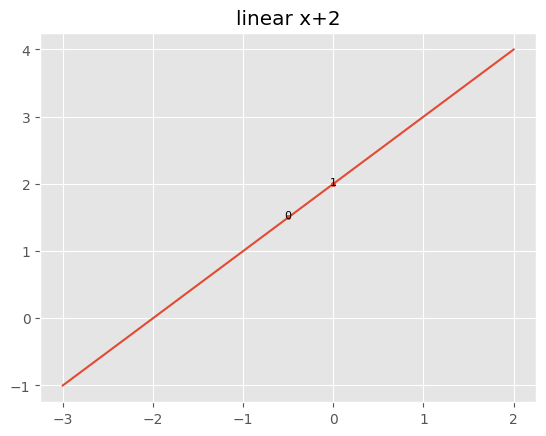

In [18]:
# To test your code first create some function, e.g. a linear function:

f = Function(lambda x: x+2,
             domain=(-3,2),
             name="linear x+2")

# Run the solution:
max_steps = 10
points, solution = bogus_search(f, max_steps)

# The function will plot itself and all points that where searched in order of visit
# By default it will annotate first and last 10 points.
f.plot(points=points)


[-1.0, 0]


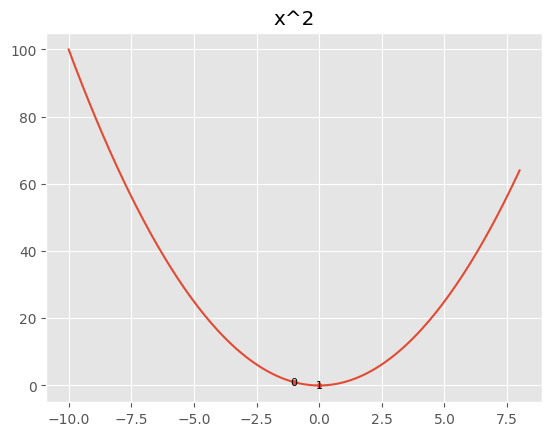

[22.5, 0]


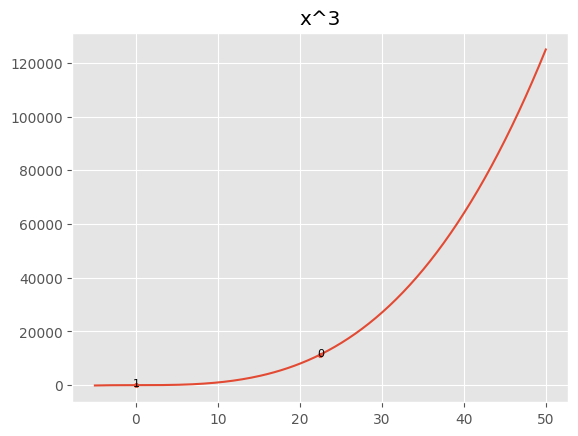

[0.09999999999999998, 0]


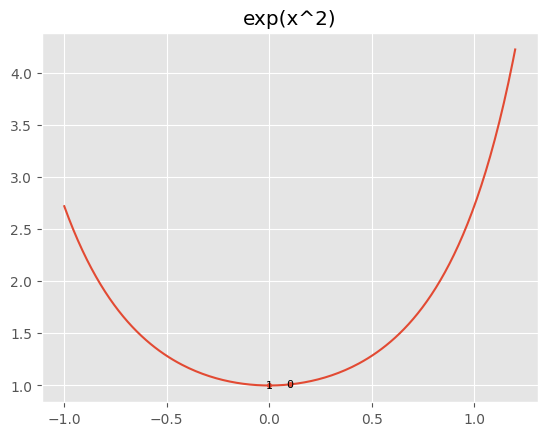

[6.2]


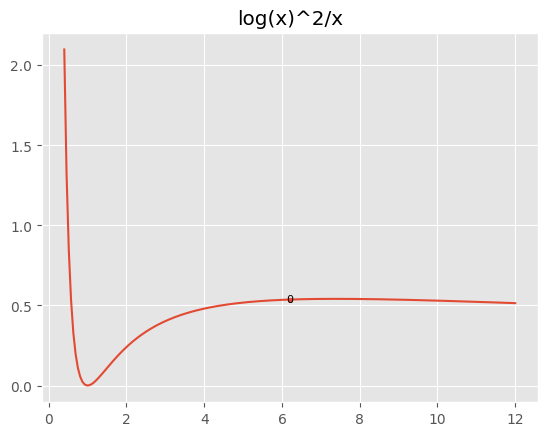

[-0.5, 0]


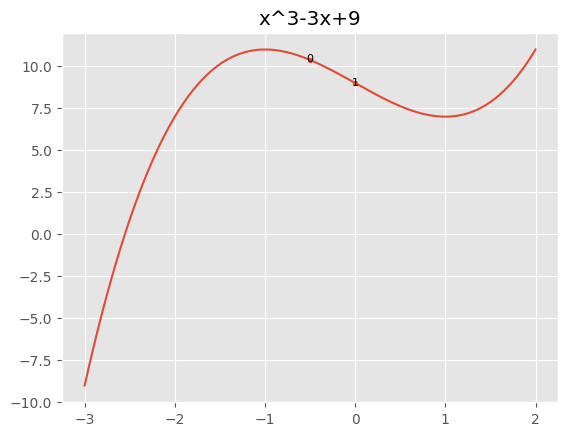

[0.0, 0]


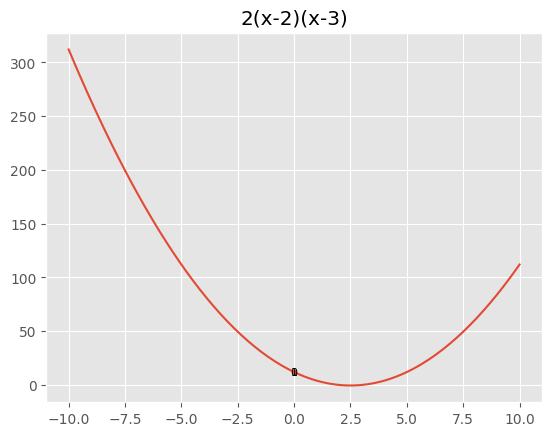

[0.0, 0]


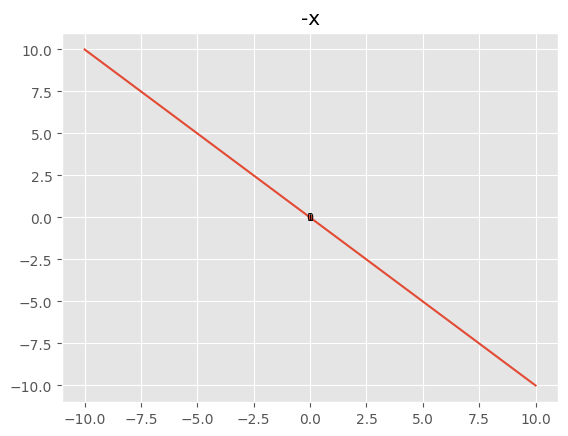

[0.0, 0]


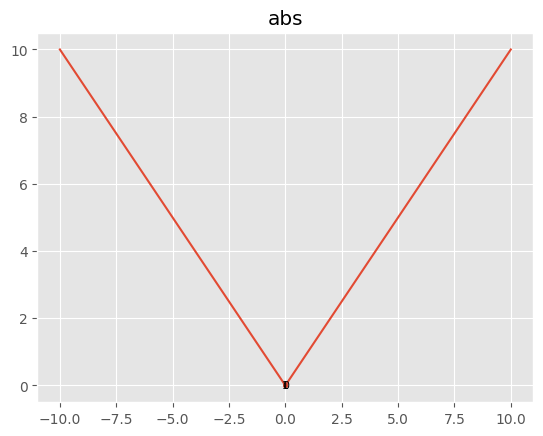

[-1.0, 0]


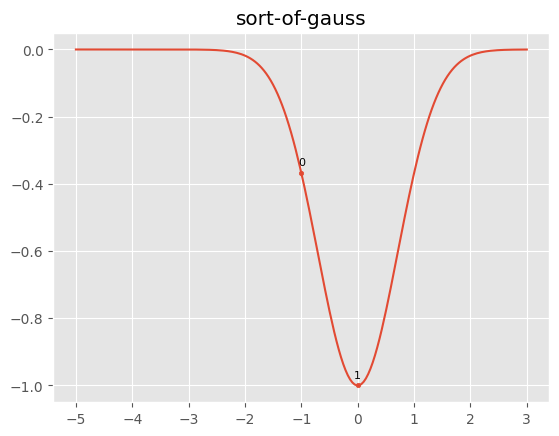

[0.0, 0]


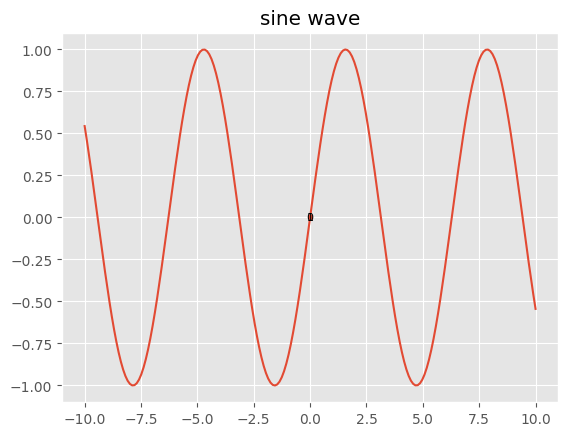

[-2.0, 0]


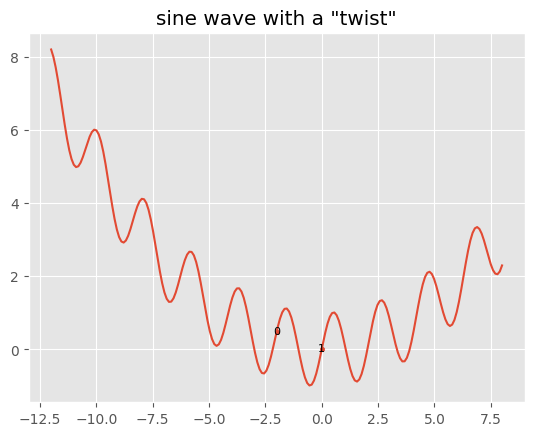

[-1.9000000000000004, 0]


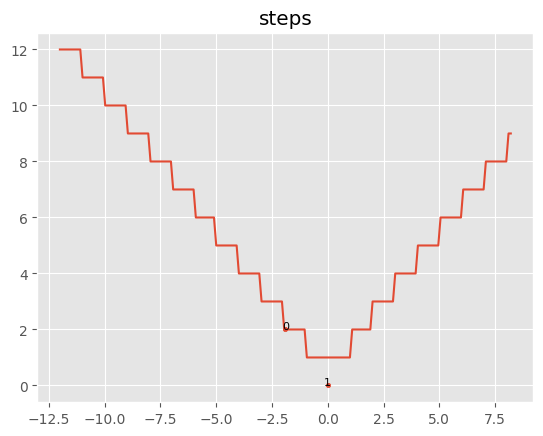

In [19]:
#You can test predefined functions and observe what happens
#(for methods you implement not bogus search)

# Later you can run predefined functions given in the file
from eco_hw1_helpers import functions
for f in functions:
    points, solution = bogus_search(f, max_steps)
    f.plot(points=points)

# Uniform search

In [32]:
def uniform_search(function: Function, n: int):
    visited_points_in_order=[]
    min_value = float('Inf')
    minimizer=0    
    a, b = function.domain
    length = (b - a)/n
    for i in range(n):
        new_point = a + ((2*i+1)/2)*length
        visited_points_in_order.append(new_point)
        if (min_value > function.evaluate(new_point)):
            minimizer = new_point
            min_value = function.evaluate(new_point)
    print("Minimizer found: ", minimizer, ", value at minimzer: ", min_value, sep="")
    return visited_points_in_order, minimizer
    

Minimizer found: -0.09999999999999964, value at minimzer: 0.009999999999999929


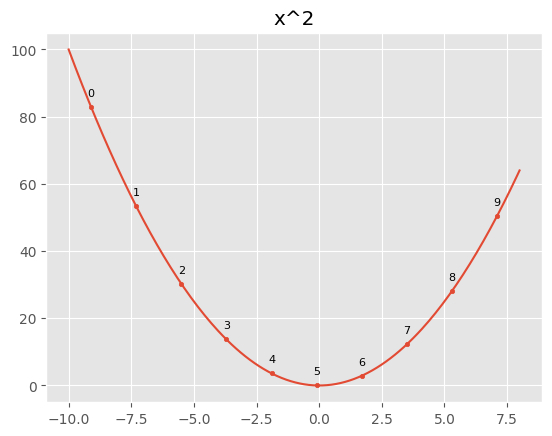

Minimizer found: -2.25, value at minimzer: -11.390625


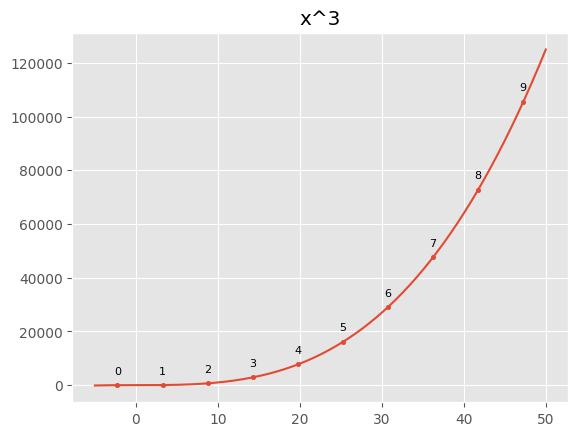

Minimizer found: -0.009999999999999898, value at minimzer: 1.0001000050001667


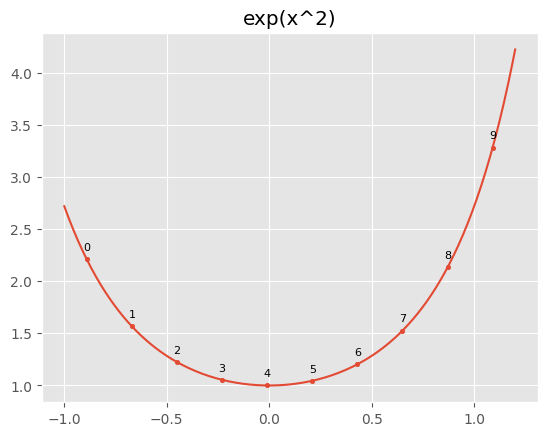

Minimizer found: 0.98, value at minimzer: 0.00041647896220138223


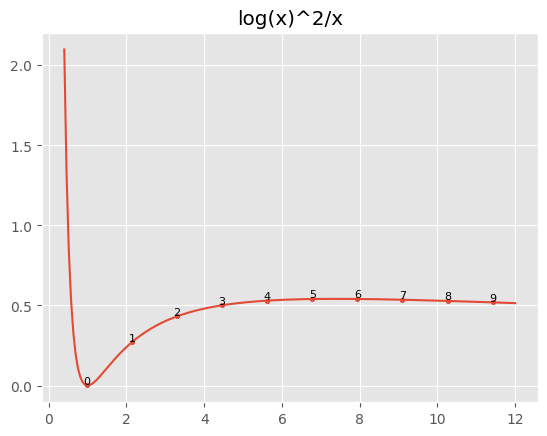

Minimizer found: -2.75, value at minimzer: -3.546875


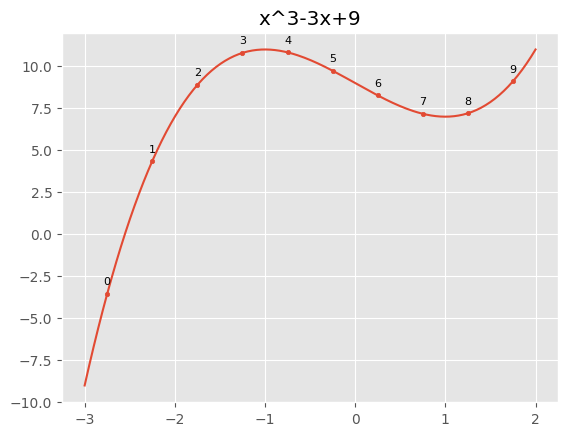

In [33]:
from eco_hw1_helpers import functions
for f in functions[:5]:
    points, solution = uniform_search(f, max_steps)
    f.plot(points=points)

# Random search

In [28]:
def random_search(function: Function, n: int):
    visited_points_in_order=[]
    min_value = float('Inf')
    minimizer=0
    a, b = function.domain
    for i in range(n):
        new_point = random.uniform(a, b)
        visited_points_in_order.append(new_point)
        if (min_value > function.evaluate(new_point)):
            minimizer = new_point
            min_value = function.evaluate(new_point)
    print("Minimizer found: ", minimizer, ", value at minimzer: ", min_value, sep="")
    return visited_points_in_order, minimizer

Minimizer found: -0.030439946829647013, value at minimzer: 0.0009265903629917373


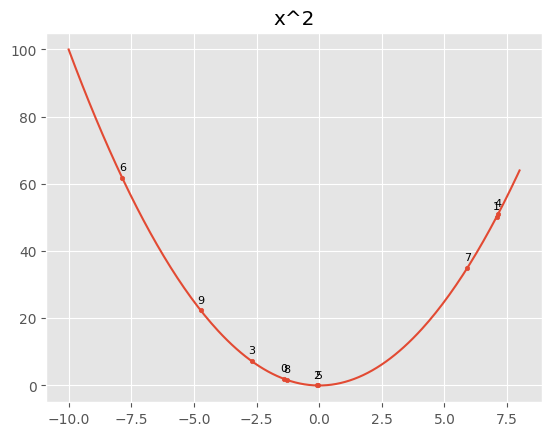

Minimizer found: 0.8592526308703743, value at minimzer: 0.6343991780441246


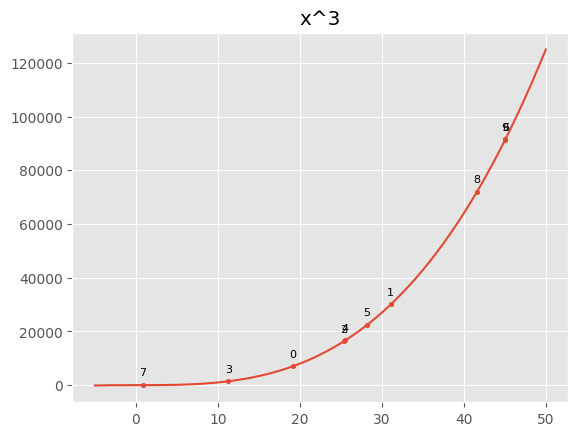

Minimizer found: 0.05297106331311041, value at minimzer: 1.0028098738646207


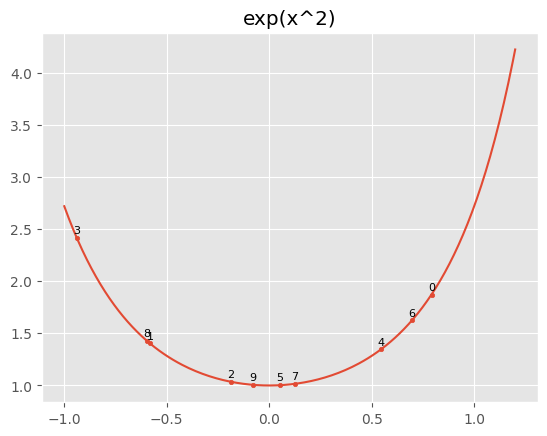

Minimizer found: 1.9950027480593646, value at minimzer: 0.23909295735292196


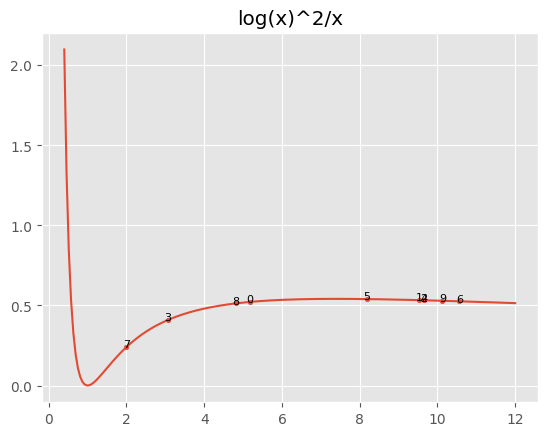

Minimizer found: -2.7241922144427875, value at minimzer: -3.04426187759033


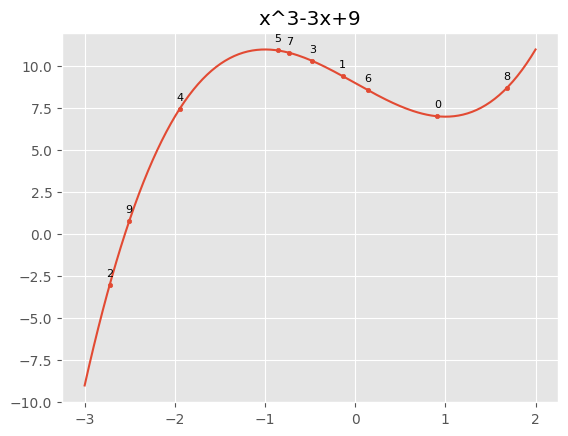

In [30]:
from eco_hw1_helpers import functions
for f in functions[:5]:
    points, solution = random_search(f, max_steps)
    f.plot(points=points)

# Dichotomous search


In [76]:
def dichotomous_search(function: Function, n: int):
    visited_points_in_order=[]
    a, b = function.domain
    delta = (b - a)/100
    for i in range(n//2):
        m = (a+b)/2
        xl = m - delta
        xr = m + delta
        visited_points_in_order.append(m)
        if (function.evaluate(xl) <= function.evaluate(xr)):
            b = xr
        else:
            a = xl
    print("Minimizer found: ", (a+b)/2, ", value at minimzer: ", function.evaluate((a+b)/2), sep="")
    return visited_points_in_order, (a+b)/2


Minimizer found: -0.17312499999999995, value at minimzer: 0.02997226562499998


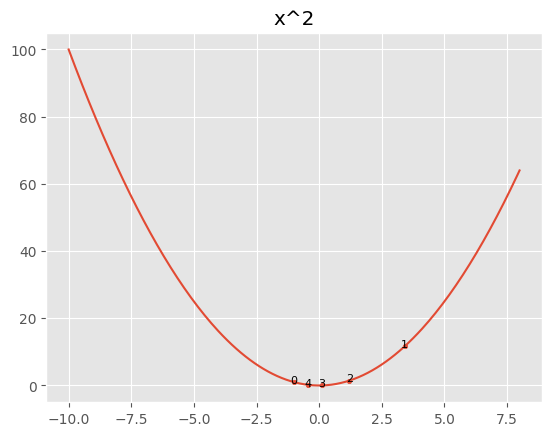

Minimizer found: -3.6078125, value at minimzer: -46.96040965652466


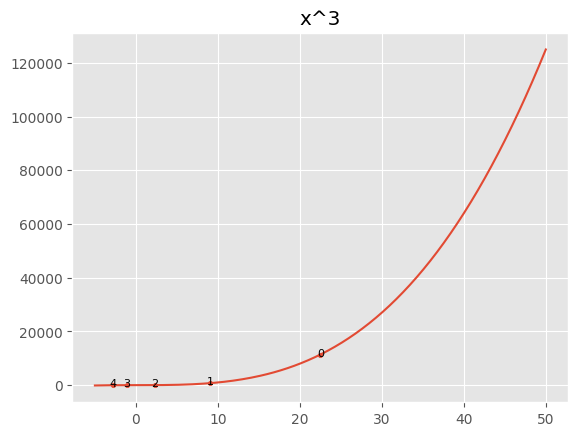

Minimizer found: -0.0010625000000000079, value at minimzer: 1.0000011289068873


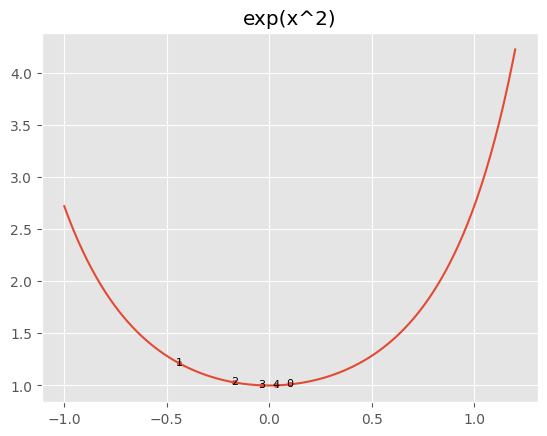

Minimizer found: 1.0488749999999998, value at minimzer: 0.002170919231635667


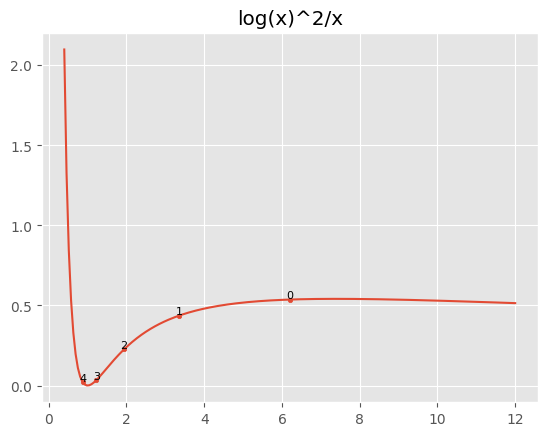

Minimizer found: 0.9546875, value at minimzer: 7.006066631317139


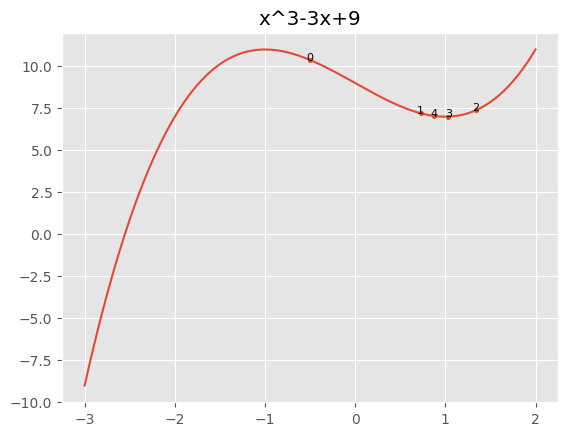

In [77]:
from eco_hw1_helpers import functions
for f in functions[:5]:
    points, solution = dichotomous_search(f, max_steps)
    f.plot(points=points)

# Bisection search

In [78]:
def bisection_search(function: Function, n: int):
    visited_points_in_order=[]
    a, b = function.domain
    for i in range(n):
        m = (a+b)/2
        visited_points_in_order.append(m)
        f_der = function.evaluate_derivative(m) 
        if (f_der == 0):
            print("Minimizer found: ", m, ", value at minimzer: ", function.evaluate(m), sep="")
            return visited_points_in_order, m
        elif (f_der < 0):
            a = m
        else:
            b = m
    print("Minimizer found: ", (a+b)/2, ", value at minimzer: ", function.evaluate((a+b)/2), sep="")
    return visited_points_in_order, (a+b)/2

Minimizer found: -0.0068359375, value at minimzer: 4.673004150390625e-05


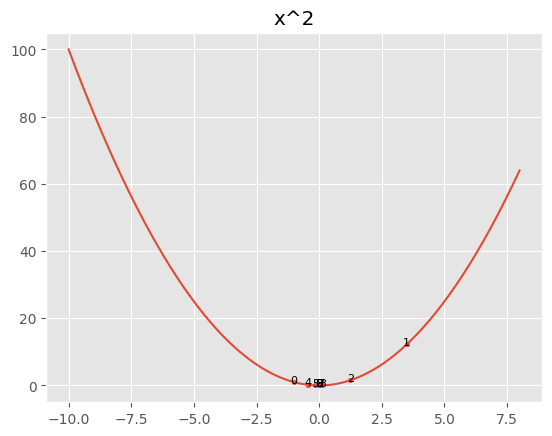

Minimizer found: -4.97314453125, value at minimzer: -122.99663871817756


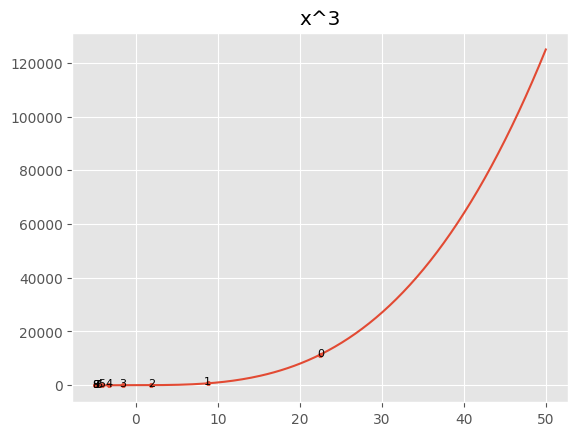

Minimizer found: 9.765624999997981e-05, value at minimzer: 1.0000000095367432


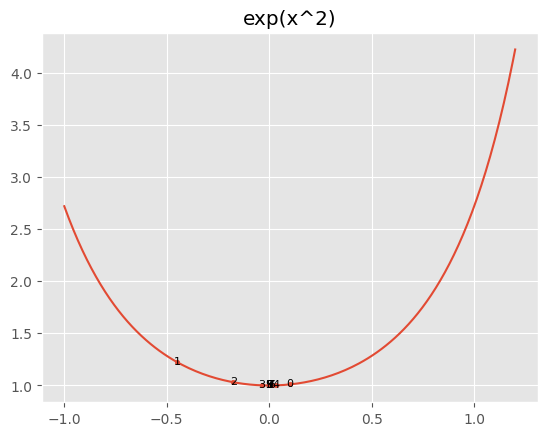

Minimizer found: 0.9947265625, value at minimzer: 2.8104713612674243e-05


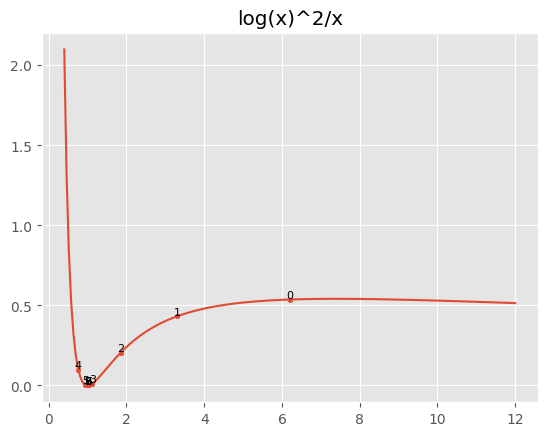

Minimizer found: 1.00146484375, value at minimzer: 7.000006440444849


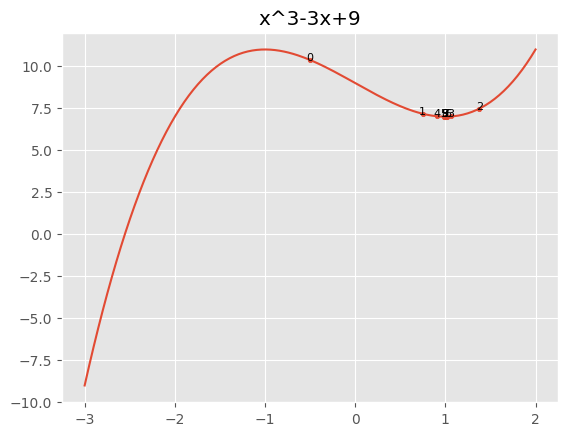

In [79]:
from eco_hw1_helpers import functions
for f in functions[:5]:
    points, solution = bisection_search(f, max_steps)
    f.plot(points=points)

# Golden-section search

In [73]:
def golden_section_search(function: Function, n: int):
    visited_points_in_order=[]
    alpha = (math.sqrt(5)-1)/2
    a, b = function.domain
    xl = alpha*a + (1-alpha)*b
    xr = (1-alpha)*a + alpha*b
    f_left = function.evaluate(xl)
    f_right = function.evaluate(xr)
    for i in range(1, n):
        visited_points_in_order.append((a+b)/2)
        if (f_left < f_right):
            b = xr
            xr = xl
            xl = alpha*a + (1 - alpha)*b
            if (i < n-1):
                f_right = f_left
                f_left = function.evaluate(xl)
        else:
            a = xl
            xl = xr
            xr = (1-alpha)*a + alpha*b
            if (i < n-1):
                f_left = f_right
                f_right = function.evaluate(xr)
    print("Minimizer found: ", (a+b)/2, ", value at minimzer: ", function.evaluate((a+b)/2), sep="")
    return visited_points_in_order, (a+b)/2

Minimizer found: 0.0031056200151419605, value at minimzer: 9.644875678450351e-06
[-1.0, 2.437694101250946, 0.31308230375283874, -1.0, -0.1884705062547316, 0.3130823037528392, 0.003105620015141697, -0.18847050625473194, -0.07006994878690814]


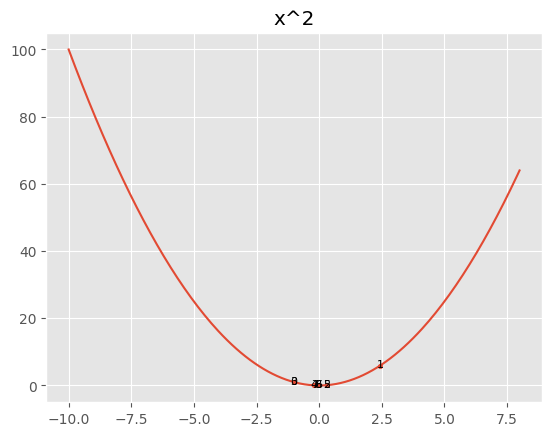

Minimizer found: -4.638220518848318, value at minimzer: -99.78245352057552
[22.5, 11.99593469062211, 5.504065309377889, 1.491869381244217, -0.9878040718663263, -2.520326546889459, -3.4674775249768675, -4.052849021912592, -4.414628503064275]


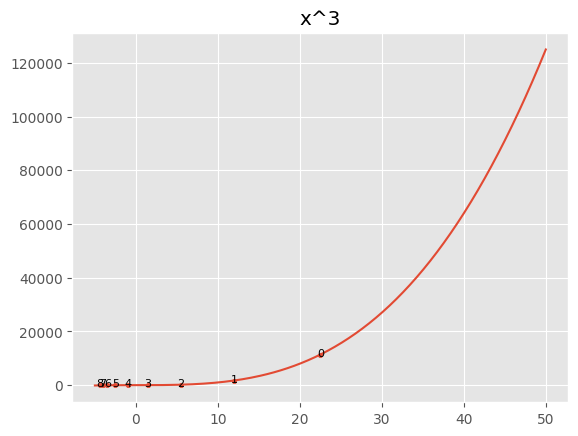

Minimizer found: -0.004714436739127313, value at minimzer: 1.0000222261607647
[0.09999999999999998, -0.3201626123751156, -0.06048783712534697, 0.09999999999999998, 0.0008130618755782804, -0.06048783712534703, -0.022601798001850658, 0.0008130618755783359, -0.013658117370489019]


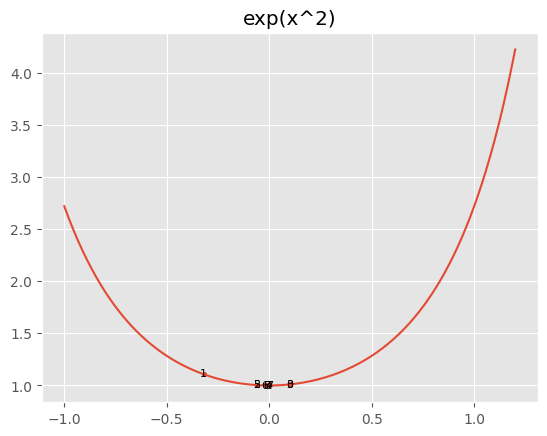

Minimizer found: 1.0284332479219351, value at minimzer: 0.0007643148174819862
[6.2, 3.9845971347493907, 2.61540286525061, 1.7691942694987803, 1.2462085957518294, 0.9229856737469506, 1.122748425489022, 0.9992882552262147, 1.0755908367054787]


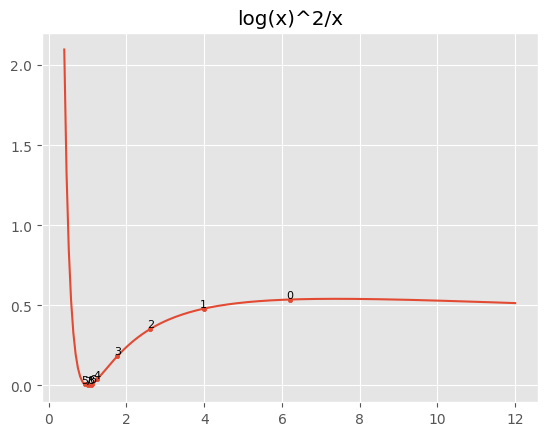

Minimizer found: 0.9996334312820714, value at minimzer: 7.0000004030686185
[-0.5, 0.45491502812526274, 1.0450849718747373, 0.6803398874989487, 0.9057647468726342, 1.0450849718747373, 0.9589803375031547, 1.0121959281336752, 0.979306884392613]


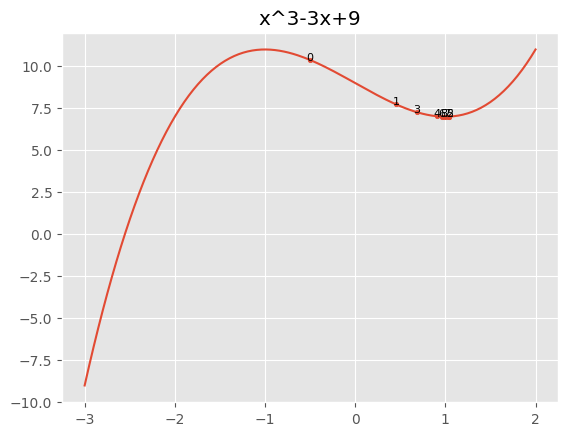

In [74]:
from eco_hw1_helpers import functions
for f in functions[:5]:
    points, solution = golden_section_search(f, max_steps)
    f.plot(points=points)